In [14]:
%matplotlib widget

from utils import visualization, weights, features, build, embedding
from sklearn.datasets import load_digits
from data import preprocessing, small
import networkx as nx
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import trustworthiness, TSNE

In [24]:
digits = load_digits()
data = digits.data
labels = digits.target
data, labels = preprocessing.remove_duplicities(data, labels, shuffle=True, normalize=True)
data.shape

(1797, 64)

In [17]:
builder = build.CheapestBuilder(weight_fun=weights.get_reciprocal_pow(1), feature_fun=features.feature_coords)
builder.build(data)

0.8307853005117217


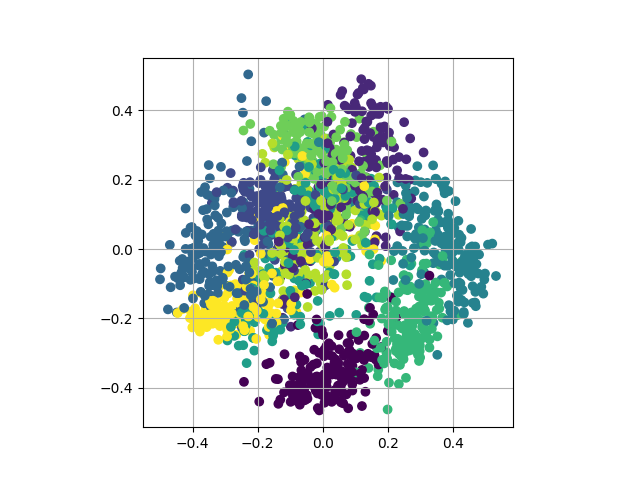

In [7]:
pca = PCA(n_components=2)
projections = pca.fit_transform(data)
print(trustworthiness(data, projections))
visualization.show_data(projections, labels=labels, square=True)

In [23]:
import umap
umap_obj = umap.UMAP(n_components=10, random_state=0)
umap_reduction = umap_obj.fit_transform(data)

print(trustworthiness(data, umap_reduction))
# visualization.show_data(umap_reduction, labels=labels)

0.9943397992990616


0.9951260298746467


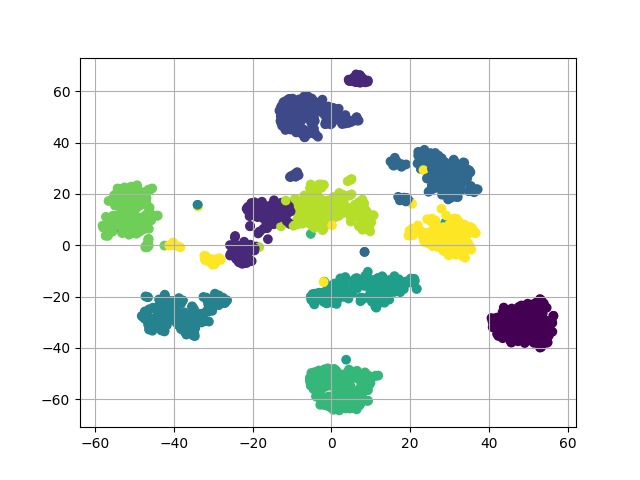

In [21]:
tsne = TSNE(n_components=2, random_state=0)
tsne_reduction = tsne.fit_transform(data)

print(trustworthiness(data, tsne_reduction))
visualization.show_data(tsne_reduction, labels=labels)

0.8301119218323316


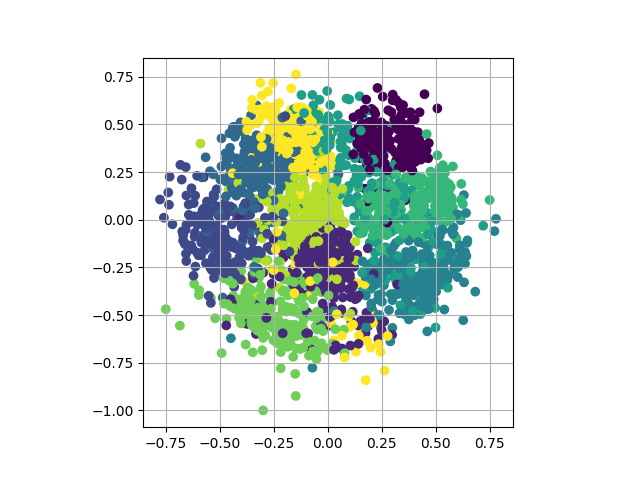

In [18]:
embedder = embedding.KamadaKawaiEmbedder(scale=1)
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
visualization.show_data(embedder.embeddings, labels=labels, square=True)

0.8365398140432178


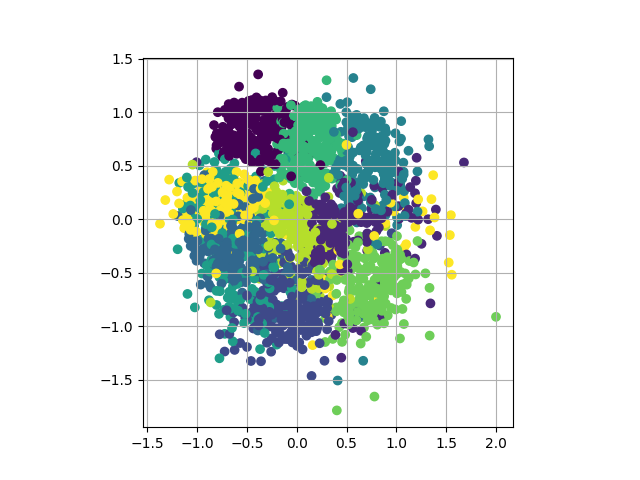

In [11]:
embedder = embedding.KamadaKawaiEmbedder(scale=2)
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
visualization.show_data(embedder.embeddings, labels=labels, square=True)

In [19]:
embedder = embedding.KamadaKawaiEmbedder(embedding_dim=10, scale=2)
embedder.embed(builder.graph)

print(trustworthiness(data, embedder.embeddings))
# visualization.show_data(embedder.embeddings, labels=labels, square=True)

0.9926905067852669


0.8156156789481755


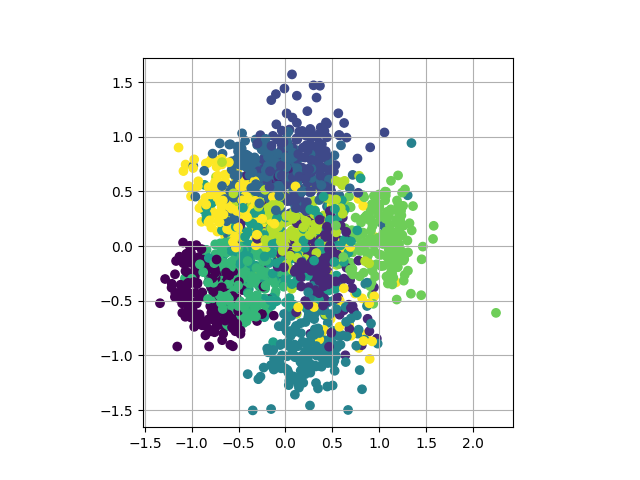

In [13]:
pca = PCA(n_components=2)
projections = pca.fit_transform(embedder.embeddings)
print(trustworthiness(data, projections))
visualization.show_data(projections, labels=labels, square=True)